#### 9주차 (dss 과정 중 8주) 
- 2021.4.4
- 회귀분석: 확률론적 선형 회귀모형, 

### 과제

# [8주차 코딩 실습](04. 회귀분석_50. 평가 점수 및 교차검증)주어진 회귀분석 코드를 이용하여 10-fold 교차검증을 수행하세요


* random_state = 1234


```
출력예시

학습 R2 = 0.51896407, 검증 R2 = 0.48972922
학습 R2 = 0.52045932, 검증 R2 = 0.47517117
학습 R2 = 0.52336854, 검증 R2 = 0.43559908
학습 R2 = 0.51634877, 검증 R2 = 0.52305505
학습 R2 = 0.53237143, 검증 R2 = 0.32484909
학습 R2 = 0.52867509, 검증 R2 = 0.40125284
학습 R2 = 0.53375833, 검증 R2 = 0.33458558
학습 R2 = 0.48962260, 검증 R2 = 0.71454059
학습 R2 = 0.50750490, 검증 R2 = 0.62362619
학습 R2 = 0.52037393, 검증 R2 = 0.48732705
```





In [1]:
# 이 코드를 먼저 실행하세요

import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()

dfX = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
dfy = pd.DataFrame(diabetes.target, columns=["target"])
df = pd.concat([dfX, dfy], axis=1)


model1 = sm.OLS.from_formula("target ~ " + "+".join(diabetes.feature_names), data=df)
result1 = model1.fit()

In [11]:
from sklearn.model_selection import KFold

scores = np.zeros(10)
cv = KFold(10, shuffle=True, random_state=1234)
for i, (idx_train, idx_test) in enumerate(cv.split(df)):
    df_train = df.iloc[idx_train]
    df_test = df.iloc[idx_test]
    
    model = sm.OLS.from_formula("target ~ " + "+".join(diabetes.feature_names), data=df_train)
    result = model.fit()
    
    pred = result.predict(df_test)
    rss = ((df_test.target - pred) ** 2).sum()
    tss = ((df_test.target - df_test.target.mean()) ** 2).sum()
    rsquared = 1 - rss / tss
    
    scores[i] = rsquared
    print("학습 R2 = {:.8f}, 검증 R2 = {:.8f}".format(result.rsquared, rsquared))
    

학습 R2 = 0.51896407, 검증 R2 = 0.48972922
학습 R2 = 0.52045932, 검증 R2 = 0.47517117
학습 R2 = 0.52336854, 검증 R2 = 0.43559908
학습 R2 = 0.51634877, 검증 R2 = 0.52305505
학습 R2 = 0.53237143, 검증 R2 = 0.32484909
학습 R2 = 0.52867509, 검증 R2 = 0.40125284
학습 R2 = 0.53375833, 검증 R2 = 0.33458558
학습 R2 = 0.48962260, 검증 R2 = 0.71454059
학습 R2 = 0.50750490, 검증 R2 = 0.62362619
학습 R2 = 0.52037393, 검증 R2 = 0.48732705


### 퀴즈

In [19]:
from sklearn.datasets import load_boston

boston = load_boston()
dfX0 = pd.DataFrame(boston.data, columns=boston.feature_names)
dfx = sm.add_constant(dfX0)
dfy = pd.DataFrame(boston.target, columns=['MEDV'])

In [20]:
df = pd.concat([dfx, dfy], axis = 1)

In [22]:
model_boston = sm.OLS(dfy, dfx)
result_boston = model_boston.fit()

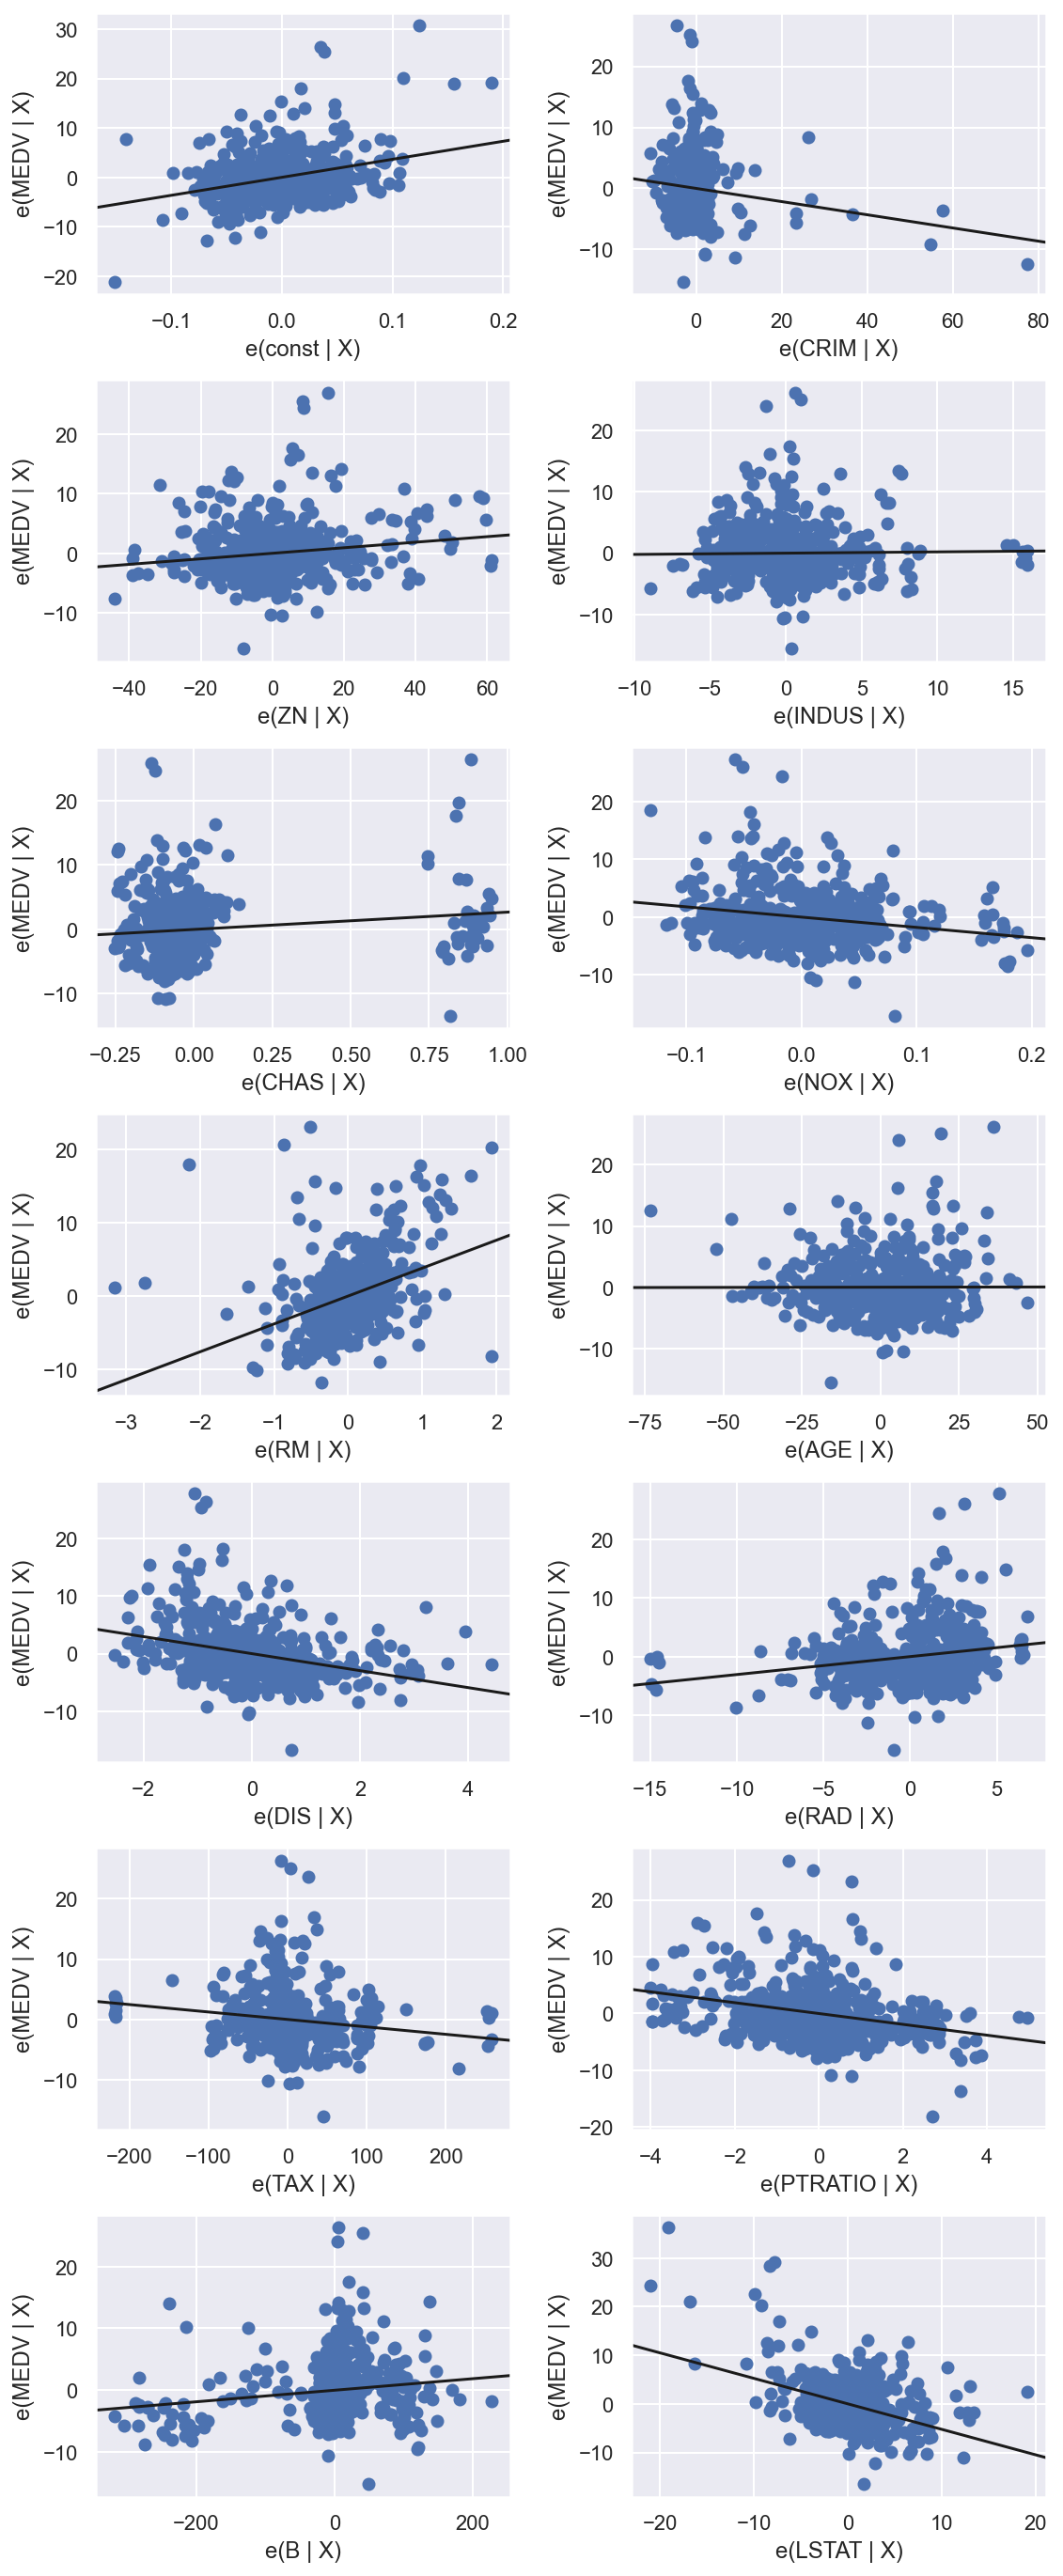

In [24]:
fig = plt.figure(figsize=(8,20))
sm.graphics.plot_partregress_grid(result_boston, fig=fig)
fig.suptitle("")
plt.show()

In [25]:
def make_regression2(n_sample=100, bias=0, noise=0.3, random_state=0):
    np.random.seed(random_state)
    x = np.random.rand(n_sample) * 4
    epsilon = noise * np.random.randn(n_sample)
    y = x ** 2 + bias + epsilon
    return x, y


x2, y2 = make_regression2()

In [27]:
dfX20 = pd.DataFrame(x2, columns=["X1"])
dfX2 = sm.add_constant(dfX20)
dfy2 = pd.DataFrame(y2, columns=["y"])

model2 = sm.regression.linear_model.OLS(dfy2, dfX2)
result2 = model2.fit()

In [28]:
test = sm.stats.omni_normtest(result2.resid)
for xi in zip(['Chi^2', 'P-value'], test):
    print("%-12s: %6.3f" % xi)

Chi^2       :  9.520
P-value     :  0.009


In [ ]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, test_size=0.2, random_state=1234)
df_train.shape, df_test.shape